# Import the libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset.

In [2]:
import pandas as pd
df = pd.read_csv(r'Review_rating.csv')
df

,Unnamed: 0,Review_title,Reiew_text,Ratings
0,0,Terrific purchase,Booting time is simply excellent\nLook is prem...,5
1,1,Awesome,Good processor\nLong lasting battery\nCompatib...,5
2,2,Wonderful,Good product,5
3,3,Good choice,Good light weight laptop in this budget range....,4
4,4,Awesome,Go for it,5
...,...,...,...,...
36540,36540,Good,NaN,4.0 out of 5 stars
36541,36541,Look of the phone is nice...,Like it...,4.0 out of 5 stars
36542,36542,Nice mobile,Working fine still,4.0 out of 5 stars
36543,36543,Not bad,Just okay,4.0 out of 5 stars


In [3]:
# Drop unnamed column.
df.drop(columns='Unnamed: 0',axis=1,inplace=True)
df.head()

,Review_title,Reiew_text,Ratings
0,Terrific purchase,Booting time is simply excellent\nLook is prem...,5
1,Awesome,Good processor\nLong lasting battery\nCompatib...,5
2,Wonderful,Good product,5
3,Good choice,Good light weight laptop in this budget range....,4
4,Awesome,Go for it,5


In [4]:
# Get the numbers of rows and columns.
df.shape

(36545, 3)

In [5]:
# Check column of the dataframe.
df.columns

Index(['Review_title', 'Reiew_text', 'Ratings'], dtype='object')

In [6]:
# Get the column datatypes.
df.dtypes

Review_title    object
Reiew_text      object
Ratings         object
dtype: object

In [7]:
# Basic information about dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36545 entries, 0 to 36544
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  34547 non-null  object
 1   Reiew_text    34225 non-null  object
 2   Ratings       34548 non-null  object
dtypes: object(3)
memory usage: 856.6+ KB


In [8]:
# Get a count of the empty values for each column.
df.isna().sum()

Review_title    1998
Reiew_text      2320
Ratings         1997
dtype: int64

In [9]:
# Check any missing/null values in the dataset.
df.isnull().values.any()

True

<AxesSubplot:>

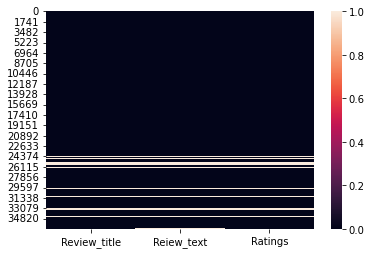

In [10]:
# Checking for null values using heatmap.
sns.heatmap(df.isnull())

In [11]:
df

,Review_title,Reiew_text,Ratings
0,Terrific purchase,Booting time is simply excellent\nLook is prem...,5
1,Awesome,Good processor\nLong lasting battery\nCompatib...,5
2,Wonderful,Good product,5
3,Good choice,Good light weight laptop in this budget range....,4
4,Awesome,Go for it,5
...,...,...,...
36540,Good,NaN,4.0 out of 5 stars
36541,Look of the phone is nice...,Like it...,4.0 out of 5 stars
36542,Nice mobile,Working fine still,4.0 out of 5 stars
36543,Not bad,Just okay,4.0 out of 5 stars


In [12]:
# Replace unnecessary words from rating column. 
df['Ratings']= df['Ratings'].str.replace('.0 out of 5 stars','')

In [18]:
# Drop NA values from dataframe.
df.dropna(axis=0,inplace=True)

In [20]:
# Reset indexing of dataframe after removing NA values.
df.reset_index(drop=True, inplace=True)

In [21]:
df

,Review_title,Reiew_text,Ratings
0,Terrific purchase,Booting time is simply excellent\nLook is prem...,5
1,Awesome,Good processor\nLong lasting battery\nCompatib...,5
2,Wonderful,Good product,5
3,Good choice,Good light weight laptop in this budget range....,4
4,Awesome,Go for it,5
...,...,...,...
34220,Overall good,Overall good,4
34221,Good,Good,4
34222,Look of the phone is nice...,Like it...,4
34223,Nice mobile,Working fine still,4


In [23]:
# Convert obj into int of rating column.
df['Ratings'] = pd.to_numeric(df['Ratings'])

In [24]:
# Get the column datatypes.
df.dtypes

Review_title    object
Reiew_text      object
Ratings          int64
dtype: object

In [35]:
# sum of duplicates values.
df.duplicated().sum()

16386

In [36]:
# dropping duplicates rows.
df.drop_duplicates(inplace=True)

# Data Analysis and Visualization

In [37]:
#summary statistics.
df.describe().style.background_gradient()

,Ratings
count,17839.000000
mean,3.660743
std,1.499987
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


<AxesSubplot:xlabel='Ratings', ylabel='count'>

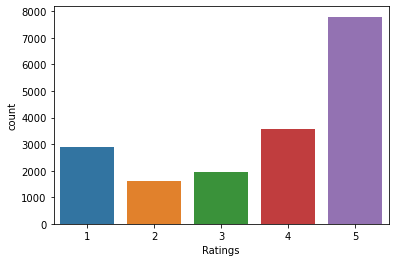

In [38]:
#Visualize the rating column.
sns.countplot(df['Ratings'])

array([[<AxesSubplot:title={'center':'Ratings'}>]], dtype=object)

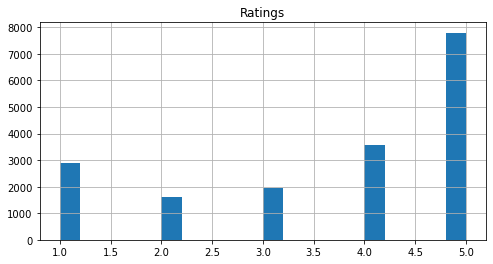

In [39]:
# display histogram of a rating column.
df.hist(figsize=(8,4), layout=(1,1), sharex=False, bins=20)

Ratings    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

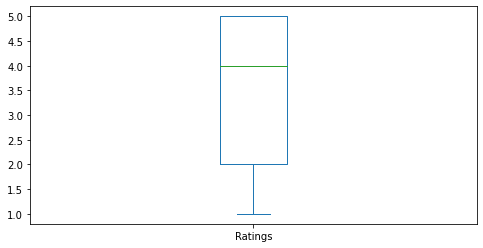

In [41]:
# checking outliers with boxplot.
df.plot(kind='box', subplots=True, layout=(1,1), figsize=(8,4))

# Data Preprocessing with NLP

In [42]:
# expanding English language contractions: https://stackoverflow.com/a/47091490/4084039

import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"“", '"', phrase)
    phrase = re.sub(r"”", '"', phrase)
    phrase = re.sub(r"‘", "'", phrase)
    phrase = re.sub(r"’", "'", phrase)
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [46]:
stop_words = stopwords.words('english')

In [47]:
lemmatizer = WordNetLemmatizer()

In [49]:
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(df['Review_title'].values):
    sent = decontracted(sentance)
    sent = re.sub(r'https?:\/\/.*[\r\n]*','',sent) # remove hyperlinks
    sent = re.sub('[^A-Za-z]+',' ',sent) # remove spacial character, numbers: https://stackoverflow.com/a/5843547/4084039
    sent = ' '.join(e for e in sent.split() if e not in stop_words) #removing stop words
    sent = ' '.join(lemmatizer.lemmatize(e) for e in sent.split()) #lemmatization
    preprocessed_titles.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 17839/17839 [00:03<00:00, 4610.43it/s]


In [50]:
df['Review_title'] = preprocessed_titles

In [51]:
from tqdm import tqdm
preprocessed_texts = []
# tqdm is for printing the status bar
for sentance in tqdm(df['Reiew_text'].values):
    sent = decontracted(sentance)
    sent = re.sub(r'https?:\/\/.*[\r\n]*','',sent) # remove hyperlinks
    sent = re.sub('[^A-Za-z]+',' ',sent) # remove spacial character, numbers: https://stackoverflow.com/a/5843547/4084039
    sent = ' '.join(e for e in sent.split() if e not in stop_words) #removing stop words
    sent = ' '.join(lemmatizer.lemmatize(e) for e in sent.split()) #lemmatization
    preprocessed_texts.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 17839/17839 [00:03<00:00, 4659.75it/s]


In [52]:
df['Reiew_text'] = preprocessed_texts

In [53]:
df

,Review_title,Reiew_text,Ratings
0,terrific purchase,booting time simply excellent look premium bes...,5
1,awesome,good processor long lasting battery compatible...,5
2,wonderful,good product,5
3,good choice,good light weight laptop budget range awesome ...,4
4,awesome,go,5
...,...,...,...
33734,best budget king,budget king br best design br nice camera br d...,4
33735,more important best phone low budget,honest review narzo a prime br br best camera ...,4
33736,best budget phone recent time go,value money br camera quality br overall perfo...,4
33737,this nice phone prize,it amazing phone prize br and super backup bet...,4


In [59]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naiveMNB = MultinomialNB()
lr = LogisticRegression()

features = tf_vec.fit_transform(df['Review_title'],df['Reiew_text'])

X = features
y = df['Ratings']

# Training process begins.

#### Finding best random_state

In [67]:
model = [naiveMNB,lr]
max_acc_score = 0
for r_state in range(0,100):
    X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=.20,random_state = r_state)
    for i in model:
        i.fit(X_train,Y_train)
        pred_test = i.predict(x_test)
        acc_sc = accuracy_score(y_test,pred_test)
        print("Accuracy score correspond to random state ",r_state,"is",acc_sc)
        if acc_sc > max_acc_score:
            max_acc_score = acc_sc
            final_state = r_state
            final_model = i

Accuracy score correspond to random state  0 is 0.6995515695067265
Accuracy score correspond to random state  0 is 0.7121636771300448
Accuracy score correspond to random state  1 is 0.6931053811659192
Accuracy score correspond to random state  1 is 0.7144058295964125
Accuracy score correspond to random state  2 is 0.6975896860986547
Accuracy score correspond to random state  2 is 0.6989910313901345
Accuracy score correspond to random state  3 is 0.7040358744394619
Accuracy score correspond to random state  3 is 0.7149663677130045
Accuracy score correspond to random state  4 is 0.7076793721973094
Accuracy score correspond to random state  4 is 0.7138452914798207
Accuracy score correspond to random state  5 is 0.7037556053811659
Accuracy score correspond to random state  5 is 0.7244955156950673
Accuracy score correspond to random state  6 is 0.7037556053811659
Accuracy score correspond to random state  6 is 0.7155269058295964
Accuracy score correspond to random state  7 is 0.699271300448

Accuracy score correspond to random state  60 is 0.7155269058295964
Accuracy score correspond to random state  61 is 0.6936659192825112
Accuracy score correspond to random state  61 is 0.7085201793721974
Accuracy score correspond to random state  62 is 0.7040358744394619
Accuracy score correspond to random state  62 is 0.7062780269058296
Accuracy score correspond to random state  63 is 0.7113228699551569
Accuracy score correspond to random state  63 is 0.7197309417040358
Accuracy score correspond to random state  64 is 0.7169282511210763
Accuracy score correspond to random state  64 is 0.7261771300448431
Accuracy score correspond to random state  65 is 0.7045964125560538
Accuracy score correspond to random state  65 is 0.7228139013452914
Accuracy score correspond to random state  66 is 0.6995515695067265
Accuracy score correspond to random state  66 is 0.7051569506726457
Accuracy score correspond to random state  67 is 0.7017937219730942
Accuracy score correspond to random state  67 is

In [68]:
print("max Accuracy score correspond to random state ",final_state,"is",max_acc_score,"and model is",final_model)

max Accuracy score correspond to random state  19 is 0.7309417040358744 and model is LogisticRegression()


# Creating train-test split

In [69]:
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=.20,random_state = 19)

### Apply best model

In [74]:
naiveMNB.fit(X_train,Y_train)
y_pred = naiveMNB.predict(x_test)
print("Accuracy score => ",accuracy_score(y_test,y_pred))

Accuracy score =>  0.7172085201793722


In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.64      0.79      0.71       571
           2       0.41      0.18      0.25       318
           3       0.56      0.36      0.44       352
           4       0.61      0.68      0.64       713
           5       0.85      0.89      0.87      1614

    accuracy                           0.72      3568
   macro avg       0.61      0.58      0.58      3568
weighted avg       0.70      0.72      0.70      3568



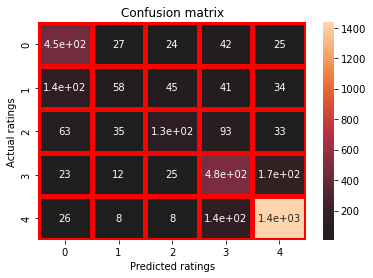

In [77]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax = plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel("Predicted ratings");ax.set_ylabel('Actual ratings')

ax.set_title('Confusion matrix')
plt.show()

In [78]:
conf_mat

array([[ 453,   27,   24,   42,   25],
       [ 140,   58,   45,   41,   34],
       [  63,   35,  128,   93,   33],
       [  23,   12,   25,  485,  168],
       [  26,    8,    8,  137, 1435]], dtype=int64)

# Cross-Validation

In [85]:
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,y_pred)
for i in range(2,10):
    lsscore = cross_val_score(naiveMNB,X,y,cv=i)
    lsc = lsscore.mean()
    print("At cv:-",i)
    print("cross validation score is :-",lsc*100)
    print("accuracy score is :-",lss*100)
    print("\n")

At cv:- 2
cross validation score is :- 54.04422689104783
accuracy score is :- 71.72085201793722


At cv:- 3
cross validation score is :- 59.44217932243846
accuracy score is :- 71.72085201793722


At cv:- 4
cross validation score is :- 62.91110612184557
accuracy score is :- 71.72085201793722


At cv:- 5
cross validation score is :- 65.54581043722916
accuracy score is :- 71.72085201793722


At cv:- 6
cross validation score is :- 65.09237135565076
accuracy score is :- 71.72085201793722


At cv:- 7
cross validation score is :- 66.00476588447061
accuracy score is :- 71.72085201793722


At cv:- 8
cross validation score is :- 66.01688504768975
accuracy score is :- 71.72085201793722


At cv:- 9
cross validation score is :- 67.44109887513989
accuracy score is :- 71.72085201793722




# Model Saving:

In [99]:
import pickle
filename = 'rating_prediction.pkl'
pickle.dump(naiveMNB,open(filename,'wb'))

# Conclusion:

In [100]:
import numpy as np
a = np.array(y_test)
#predicted = np.array(ls.predict(x_test))
df_comp = pd.DataFrame({'original':a,'predicted':y_pred},index=range(len(a)))
df_comp

,original,predicted
0,4,4
1,2,1
2,4,5
3,5,5
4,2,3
...,...,...
3563,4,5
3564,1,1
3565,4,4
3566,5,5
